In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from keras.datasets import mnist

(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


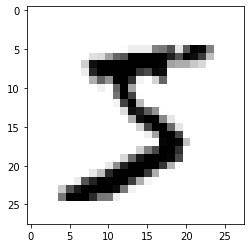

In [4]:
single_image = x_train[0]
plt.imshow(single_image,cmap='gray_r')

In [5]:
## Data Preprocessing and normalizing the data between 0 and 1
x_train = x_train.reshape(60000,784)
x_train = x_train/255
x_test = x_test.reshape(10000,784)
x_test = x_test/255

In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
s = StandardScaler()


In [8]:
x_train = s.fit_transform(x_train)
x_test  = s.fit_transform(x_test)

## Linear SVM:

In [9]:
from sklearn.svm import SVC 

In [10]:
model = SVC(C=1,kernel='linear')

In [11]:
model.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
predictions = model.predict(x_test)

In [14]:
print("\nTesting Accuracy = ", accuracy_score(y_true=y_test, y_pred=predictions))


Testing Accuracy =  0.928


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.89      0.93      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.89      0.90       892
           6       0.96      0.93      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.88      0.90       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [16]:
print(confusion_matrix(y_test,predictions))

[[ 953    0    6    2    1    8    6    2    1    1]
 [   0 1118    7    2    0    1    2    1    4    0]
 [   9   12  956   11    9    4    5    5   18    3]
 [   7    1   15  940    0   17    1    6   19    4]
 [   3    2   18    1  927    0    3    6    3   19]
 [   7    6    7   40    5  791   12    1   20    3]
 [  14    3   17    1    9   19  892    0    3    0]
 [   2    8   23   14   11    2    0  945    2   21]
 [  11    7   10   29    8   23    8    6  860   12]
 [   9    7    6   11   38    5    0   23   12  898]]


## Linear SVM with PCA

In [17]:
x_train_PCA = x_train
x_test_PCA = x_test

In [18]:
## Applying PCA on the Dataset
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=0.97)        # Should lie between 0.95 to 0.99
x_train_PCA = pca.fit_transform(x_train_PCA)  
x_test_PCA = pca.transform(x_test_PCA)

In [20]:
model_PCA = SVC(C=1,kernel='linear')

In [21]:
model_PCA.fit(x_train_PCA,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
predictions_PCA = model_PCA.predict(x_test_PCA)

In [23]:
print("\nTesting Accuracy = ", accuracy_score(y_true=y_test, y_pred=predictions_PCA))


Testing Accuracy =  0.937


In [24]:
print(classification_report(y_test,predictions_PCA))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.99      0.98      1135
           2       0.91      0.93      0.92      1032
           3       0.90      0.94      0.92      1010
           4       0.94      0.95      0.95       982
           5       0.91      0.90      0.90       892
           6       0.96      0.94      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.90      0.91       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [25]:
print(confusion_matrix(y_test,predictions_PCA))

[[ 956    0    3    3    2    8    6    0    1    1]
 [   0 1119    6    2    0    1    3    1    3    0]
 [   8    9  963   10    6    6    7    6   17    0]
 [   4    2   14  948    1   16    2    6   15    2]
 [   2    1   11    1  936    1    5    4    3   18]
 [  13    5    4   35    5  801    7    1   19    2]
 [   7    4   17    1    8   17  902    0    2    0]
 [   1    5   24   13    9    2    0  952    3   19]
 [  10    8   10   26    5   23    6    6  872    8]
 [   5    7    3    9   26    4    0   24   10  921]]


## Linear SVM with LDA

In [39]:
x_train_LDA = x_train
x_test_LDA = x_test

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [49]:
lda = LDA(n_components=6)
x_train_LDA = lda.fit_transform(x_train_LDA, y_train)  
x_test_LDA = lda.transform(x_test_LDA)

In [50]:
model_LDA = SVC(C=1,kernel='linear')

In [51]:
model_LDA.fit(x_train_LDA,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
predictions_LDA = model_LDA.predict(x_test_LDA)

In [53]:
print("\nTesting Accuracy = ", accuracy_score(y_true=y_test, y_pred=predictions_LDA))


Testing Accuracy =  0.8528


In [54]:
print(classification_report(y_test,predictions_LDA))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.95      0.96      0.95      1135
           2       0.89      0.88      0.89      1032
           3       0.80      0.82      0.81      1010
           4       0.83      0.89      0.86       982
           5       0.74      0.75      0.75       892
           6       0.91      0.92      0.92       958
           7       0.90      0.84      0.87      1028
           8       0.75      0.68      0.72       974
           9       0.79      0.79      0.79      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [55]:
print(confusion_matrix(y_test,predictions_LDA))

[[ 947    0    3    2    0   11   12    2    3    0]
 [   0 1088    6    3    0    2    3    1   30    2]
 [  13    8  909   27   13    5   21    7   24    5]
 [   3    1   30  824    1   72    1   21   53    4]
 [   0    4    8    0  870    2   14    1   14   69]
 [  11    2   10   79   10  670   14   14   74    8]
 [  16    3   13    0   12   23  885    0    5    1]
 [   3   16   18   12    4    0    0  868    3  104]
 [  12   23   18   64   25  109   22   11  665   25]
 [  10    2    3   13  112   11    1   40   15  802]]
